In [2]:
import EITfunc.EITlook as eit

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import matplotlib.cm as cmx
import matplotlib.colorbar as cb
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import gridspec

import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

import os

from astropy import units as u
from astropy.constants import G
from astropy.io import ascii, fits
from astropy.table import Table
from astropy.timeseries import LombScargle
import astropy.time

import scipy.optimize as sciop
from scipy.stats import mode, binned_statistic

import time

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
#Systematically save examples of images corresponding to every unique scientific objective in 1996.
sci_objs = []
dates = []
examplefpaths = []

#for year in range(1996, 2010):
for year in [2011]:  
    for m in range(1,13):
        month = str(m).zfill(2)
        days = sorted([int(f.path[-2:]) for f in os.scandir("./EIT/{0}/{1}/".format(year,month)) if f.is_dir()])

        for d in days:
            day = str(d).zfill(2)
            fitsFiles = os.scandir("./EIT/{0}/{1}/{2}/".format(year,month,day))
            
            for f in fitsFiles:
                #print(f.name)
                hdul = fits.open(f.path)
                header = hdul[0].header

                sci_objs.append(header['SCI_OBJ'])
                dates.append(header['DATE-BEG'])
                examplefpaths.append(f.path)

uniq_sci_objs = []
example_uniq_sci_objs = []
for i in range(len(sci_objs)):
    if sci_objs[i] not in uniq_sci_objs:
        #print(sci_objs[i])
        #print(dates[i])
        uniq_sci_objs.append(sci_objs[i])
        example_uniq_sci_objs.append(examplefpaths[i])

In [3]:
print(len(uniq_sci_objs))
print(uniq_sci_objs)
#print(example_uniq_sci_objs)

10
['FULL SUN 171/284/195/304', 'DARK IMAGE', 'CALIBRATION LAMP', 'DARK IMAGE HTR ON', 'CME WATCH 195', 'FULL SUN 195', 'SECTOR HANG', 'FULL SUN 284', 'FULL SUN 304', 'FULL SUN 171']


1996-12-30T01:05:52.225Z
195


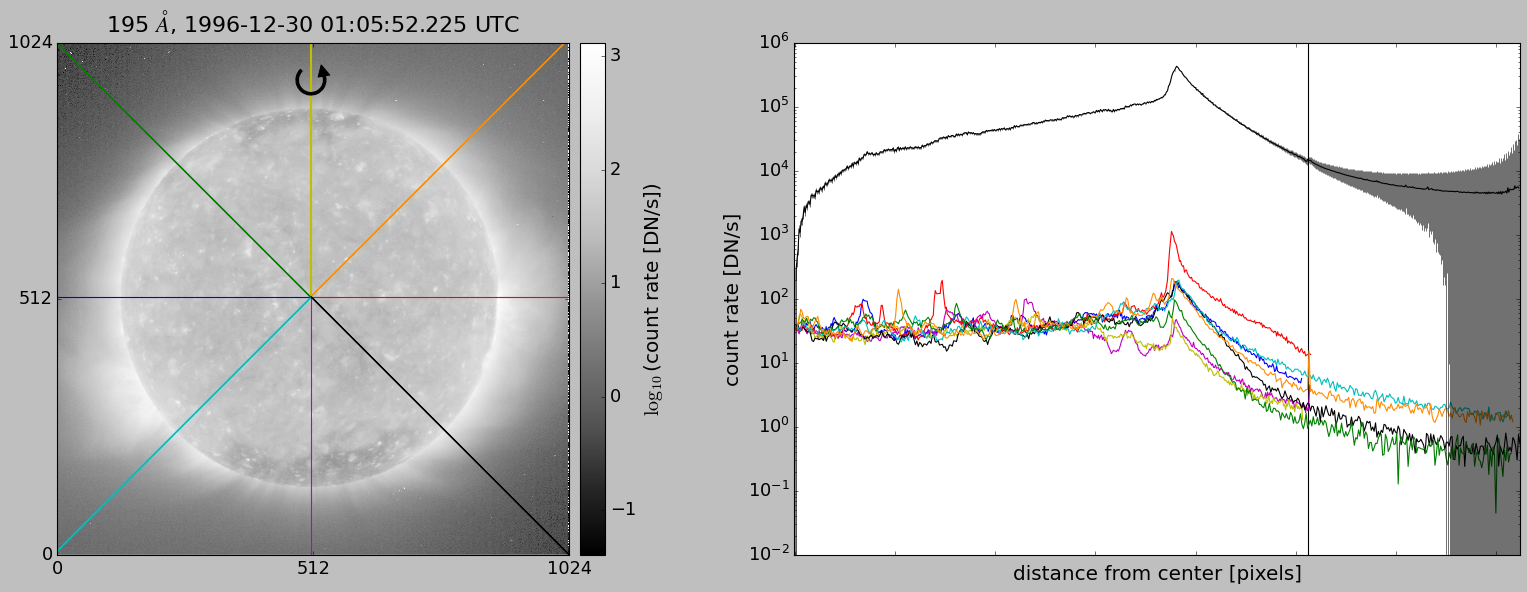

34776192.34903804 103950.27631322957
ratio is 0.0029891218472083525
34776192.34903804 103950.27631322957
ratio is 0.0029891218472083525
1996-12-30T02:10:06.288Z
284


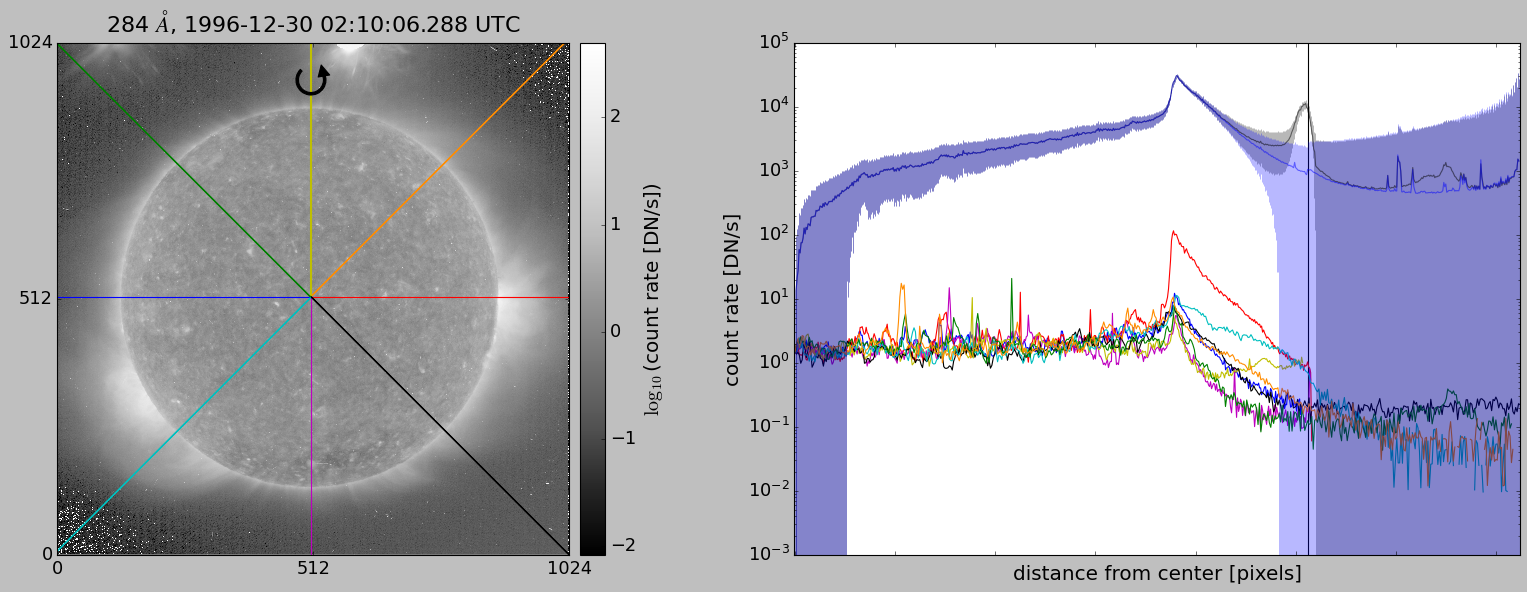

2357807.5812062956 105104.82047564794
ratio is 0.04457735283974042
2141517.9624091187 110886.63343053845
ratio is 0.051779455216801266
1996-12-30T02:04:02.991Z
304


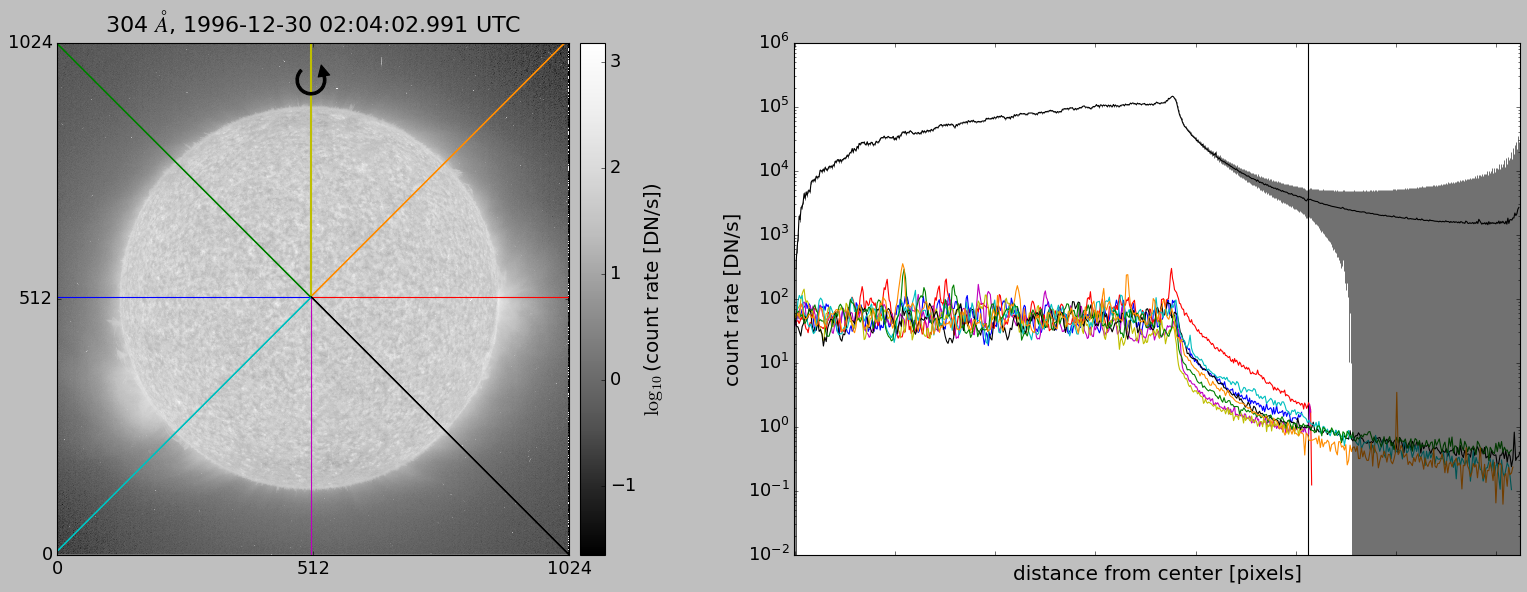

26986489.536240954 103642.77735440181
ratio is 0.00384054314345765
26986489.536240954 103642.77735440181
ratio is 0.00384054314345765
1996-12-30T01:00:10.329Z
171


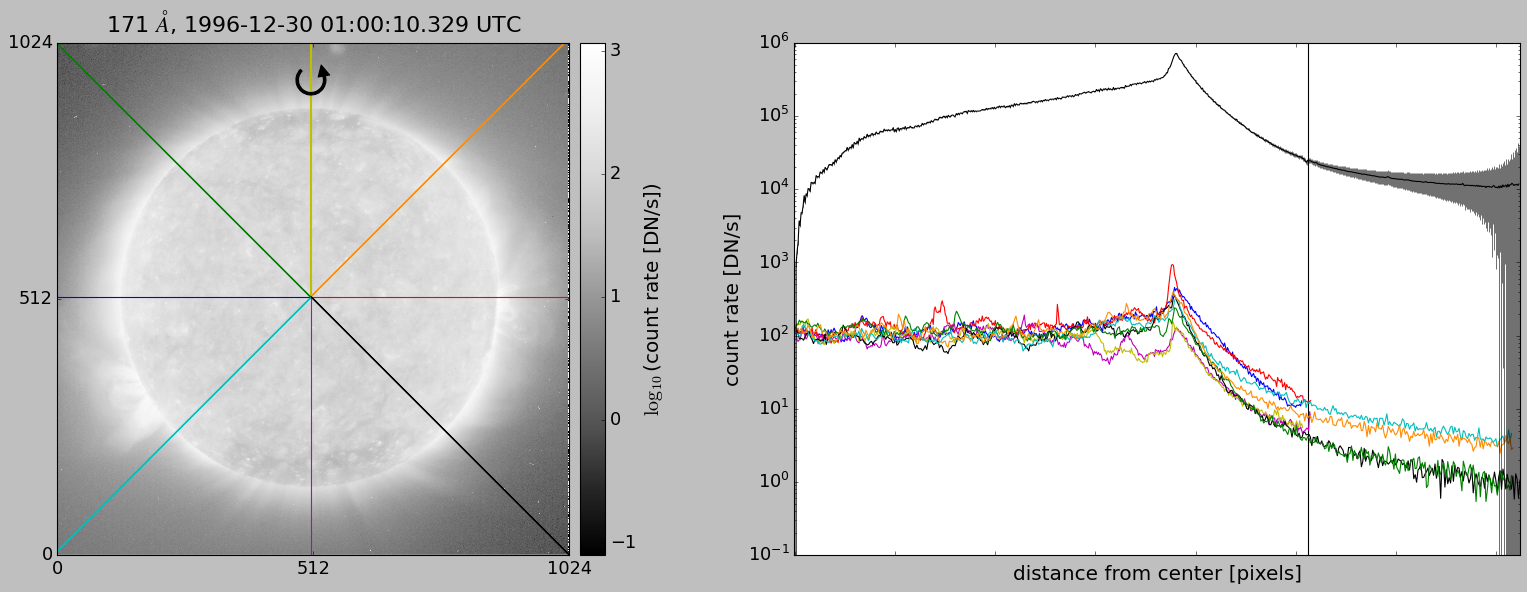

76536388.29003412 104039.76526408043
ratio is 0.0013593503376436115
76536388.29003412 104039.76526408043
ratio is 0.0013593503376436115


In [126]:
for f in os.scandir("./EIT/1996/12/30"):
    hdul = fits.open(f.path)
    header = hdul[0].header
    data = hdul[0].data

    #print(repr(header))
    sci_obj_ = header['SCI_OBJ'].replace("/"," ").replace(" ","_").lower()
    
    if "full_sun" in sci_obj_:
        #print(header['MSBLOCKS'])
        if np.shape(data) == (1024,1024) and header['MSBLOCKS'] == 0:
            print(header['DATE-BEG'])
            print(header['WAVELNTH'])

            #print(np.min(data))
            #print(len(np.ravel(data[data <= 0.])))
            # substitute nans for negative numbers
            data[data <= 0.] = np.nan
            #print(data[data <= 0.])
            
            xcenter, ycenter = eit.center_from_header(header)
            xcenter = int(np.round(xcenter,0))
            ycenter = int(np.round(ycenter,0))

            obsdate = header['DATE-BEG'].split("T")[0]
            obstime = header['DATE-BEG'].split("T")[1].split("Z")[0]
            wavelength = header['WAVELNTH']

            eit.plot_full_sun_annuli_EIT(f.name, header, data, figtitle=r"{0} $\AA$, {1} {2} UTC".format(wavelength, obsdate, obstime), xcenter=xcenter, ycenter=ycenter, maskBrightSpots=True)

            testF, testFunc = eit.image_to_LCpoint(data, xcenter=xcenter, ycenter=ycenter, maskBrightSpots=False)
            print(testF, testFunc)
            print('ratio is {0}'.format(testFunc/testF))

            testF, testFunc = eit.image_to_LCpoint(data, xcenter=xcenter, ycenter=ycenter, maskBrightSpots=True)
            print(testF, testFunc)
            print('ratio is {0}'.format(testFunc/testF))


    #signal = np.sum(data)
    #noise = np.sqrt(np.sum(data) + 1024*1024*852.)
    #print("signal is {0}".format(signal))
    #print("sqrt(signal) is {0}".format(np.sqrt(signal)))
    #print("noise is {0}".format(noise))
    #print("SNR is {0}".format(signal/noise))

    
    hdul.close()
